In [1]:
import gym

import retro
import copy
import numpy as np
import random

# for g in retro.data.list_games():
#     if "sonic" in g.lower():
#         print(g)
#         for s in retro.data.list_states(g):
#             print("\t %s"%s)




# retro.data.list_states("SonicTheHedgehog-Genesis")



In [2]:
class SonicDiscretizer(gym.ActionWrapper):
    """
    Wrap a gym-retro environment and make it use discrete
    actions for the Sonic game.
    """
    def __init__(self, env):
        super(SonicDiscretizer, self).__init__(env)
        buttons = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
        actions = [['DOWN', 'B'], ["RIGHT"]] #['LEFT'],['LEFT'], ['LEFT'], ['RIGHT'], ['RIGHT'],  ['RIGHT'],['RIGHT'], ['RIGHT'],['DOWN', 'B'] ]
        
        
        #, ['LEFT', 'DOWN'], ['RIGHT', 'DOWN'], ['DOWN'],
                   #['DOWN', 'B'], ["B"]]
        self._actions = []
        for action in actions:
            arr = np.array([False] * 12)
            for button in action:
                arr[buttons.index(button)] = True
            self._actions.append(arr)
        self.action_space = gym.spaces.Discrete(len(self._actions))

    def action(self, a): # pylint: disable=W0221
        return self._actions[a].copy()

In [3]:
def bucket_coord(coord, num_buckets, max_coord, min_coord=0):
    try:
        assert (coord < max_coord and coord >= min_coord)
    except:
        print("coord: %i, max: %i, min: %i, num_buckets: %i"%(coord, max_coord, min_coord,num_buckets))
        assert False
        #coord = 0
    coord_range = (max_coord - min_coord) + 1
    thresh =  coord_range/num_buckets
    bucketed_coord =  np.floor((coord - min_coord) /thresh)
    return bucketed_coord

In [4]:
def sonic_get_latent_dict(env):
    
    y = env.env.data.lookup_value("y")
    screen_y = env.env.data.lookup_value("screen_y")
    x = env.env.data.lookup_value("x")
    screen_x = env.env.data.lookup_value("screen_x")
    x_coord = bucket_coord(x - screen_x,16,200)
    y_coord = bucket_coord(y - screen_y,16,220)
    latent_dict = dict(x_coord=x_coord,y_coord=y_coord)
    return latent_dict

def sonic_get_nclasses_table(env):
    return dict(x_coord=env.num_buckets,
                y_coord=env.num_buckets)

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

env = SonicDiscretizer(retro.make("SonicTheHedgehog-Genesis",state='GreenHillZone.Act2'))

In [6]:
env.get_latent_dict = sonic_get_latent_dict

/network/home/racaheva/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


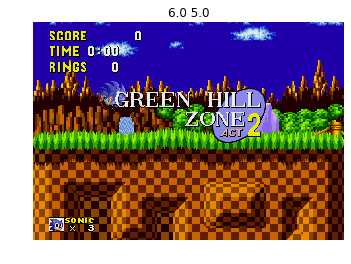

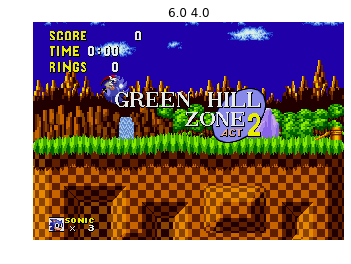

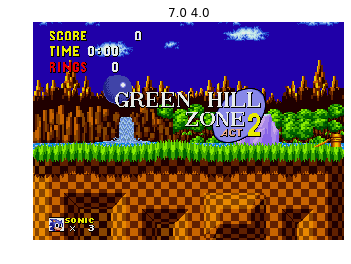

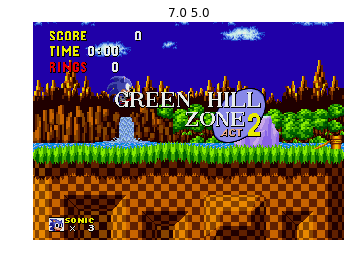

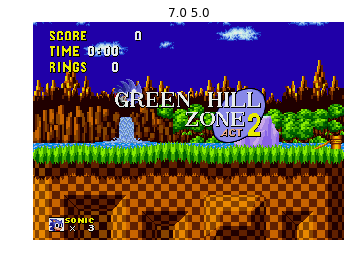

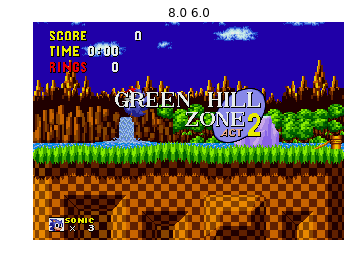

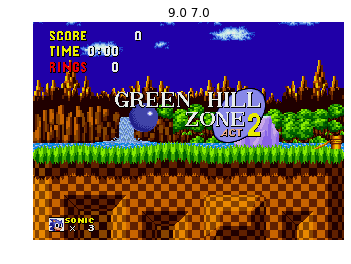

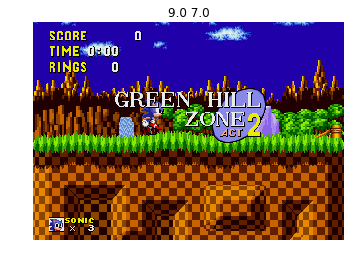

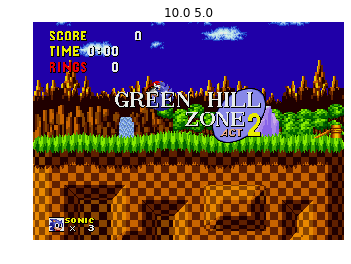

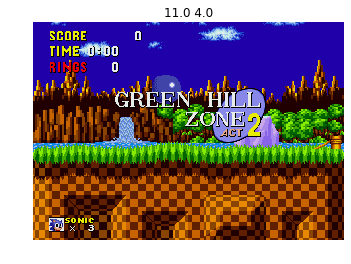

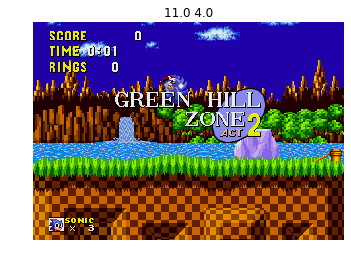

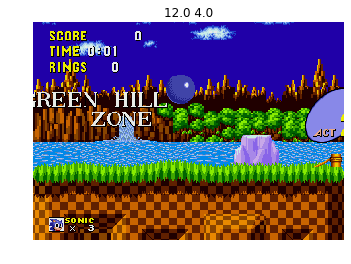

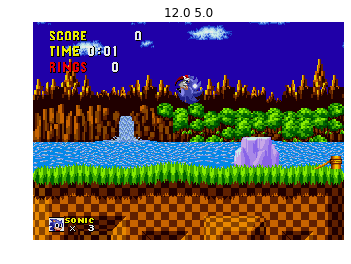

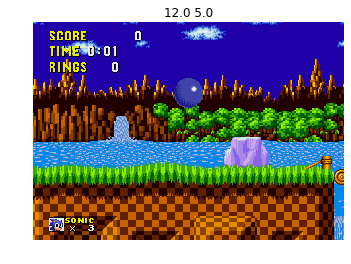

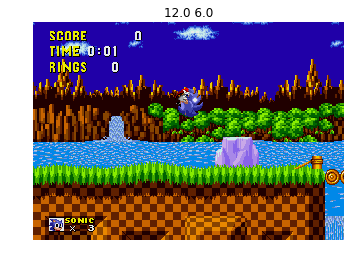

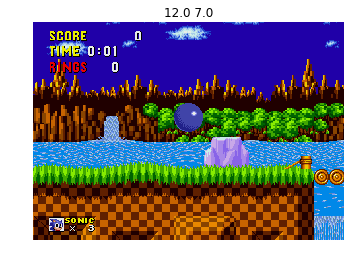

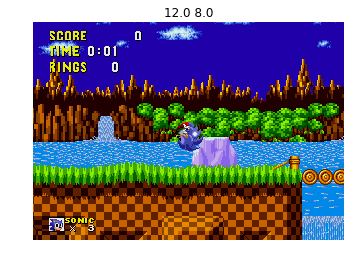

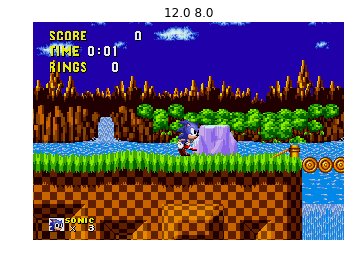

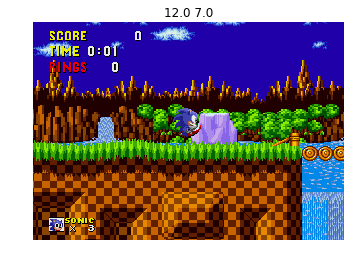

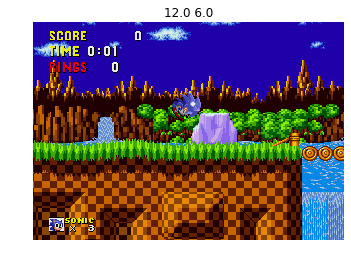

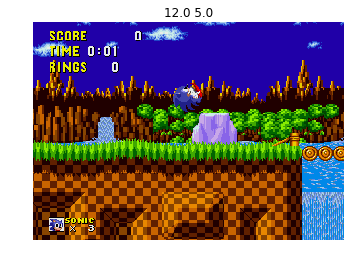

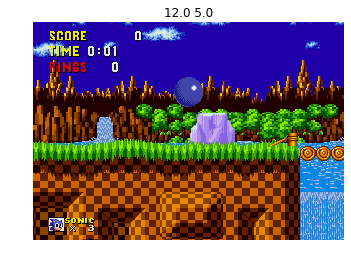

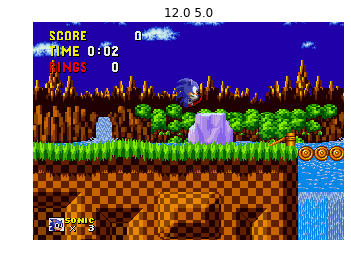

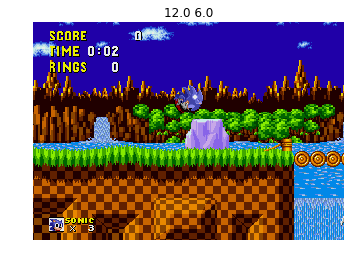

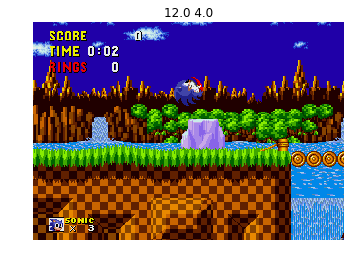

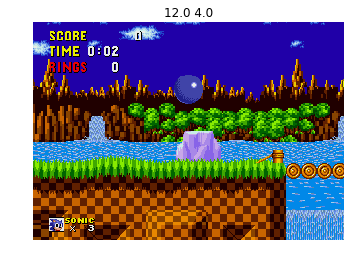

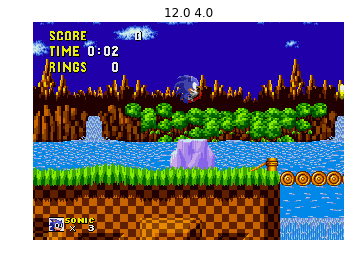

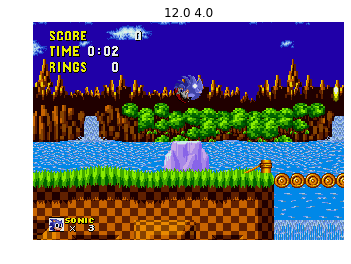

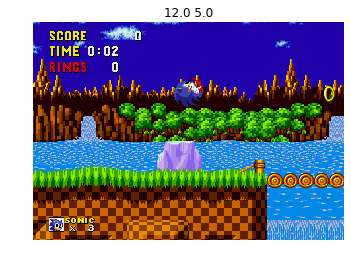

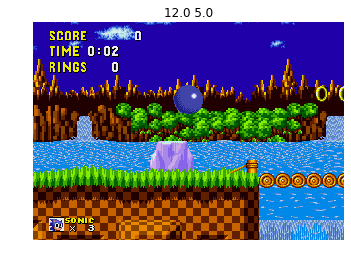

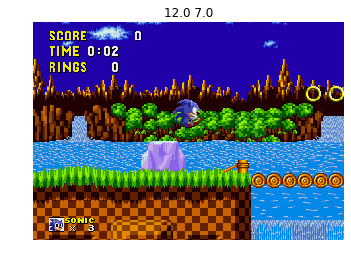

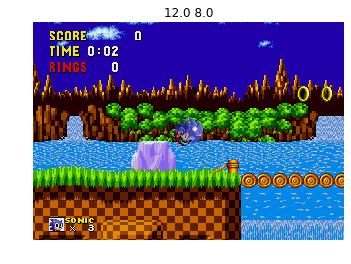

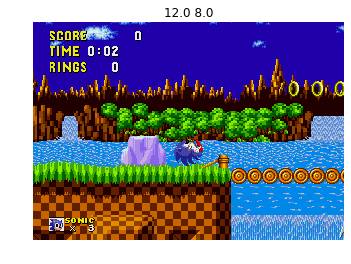

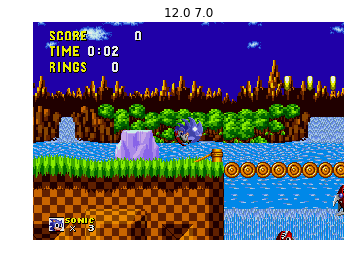

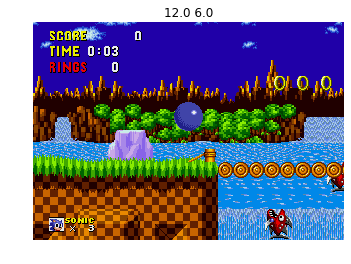

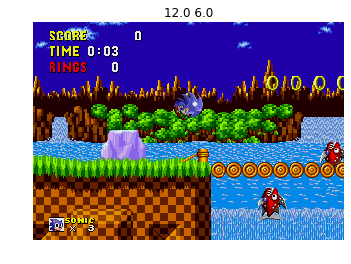

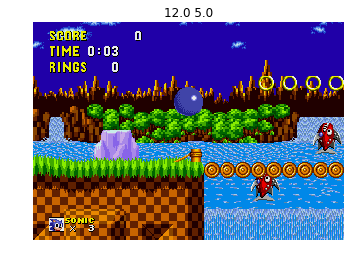

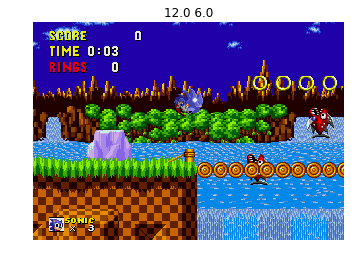

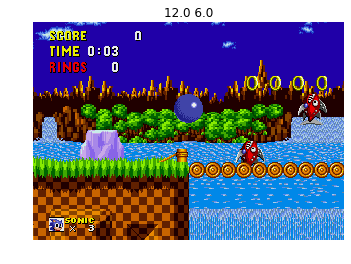

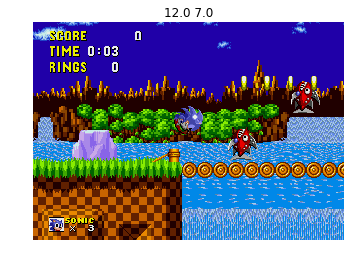

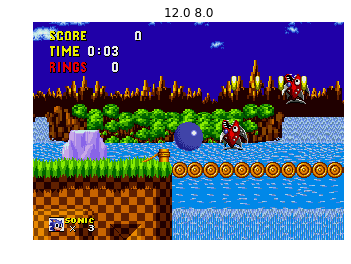

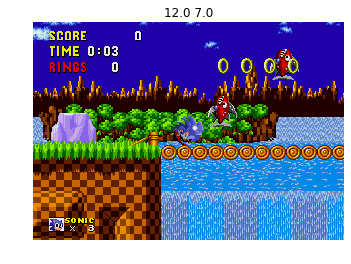

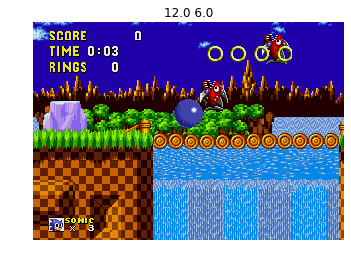

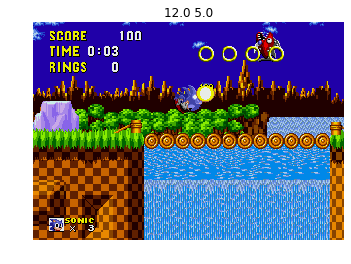

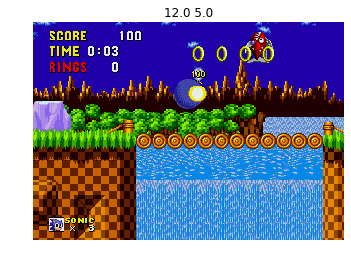

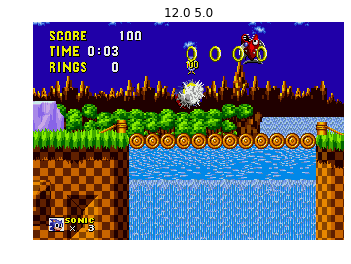

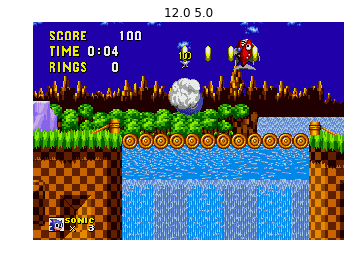

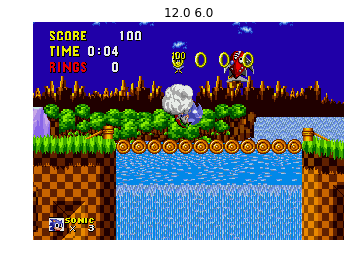

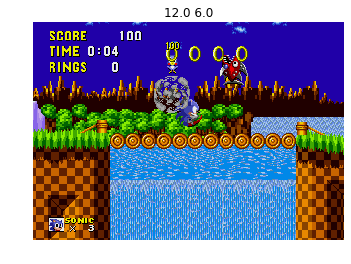

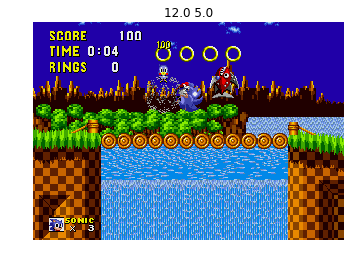

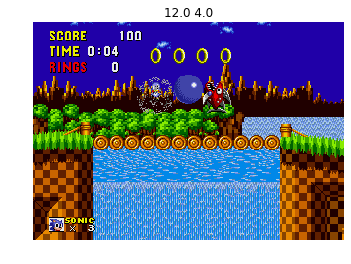

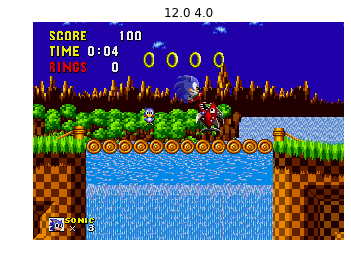

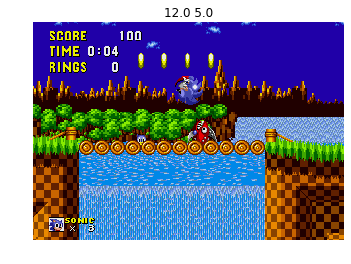

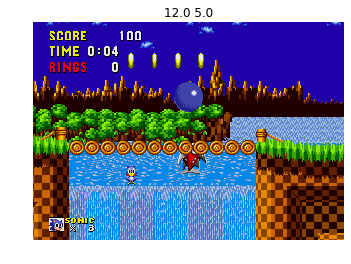

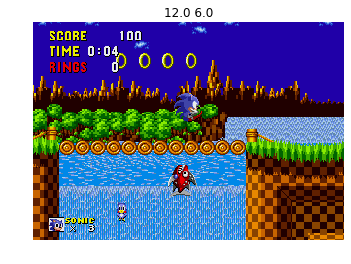

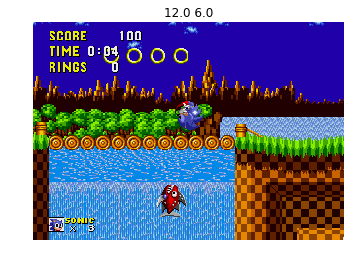

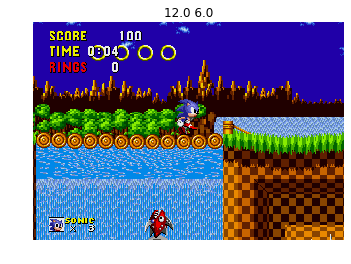

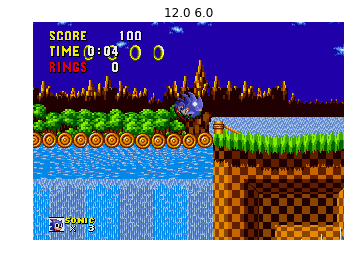

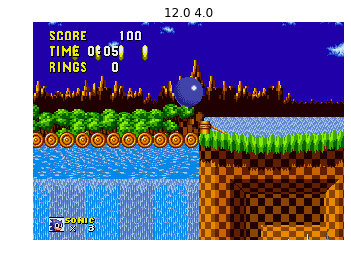

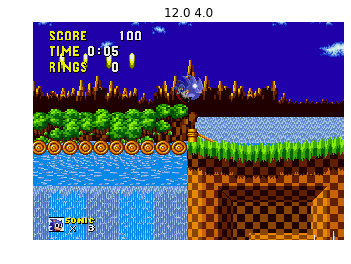

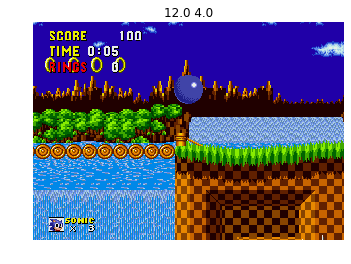

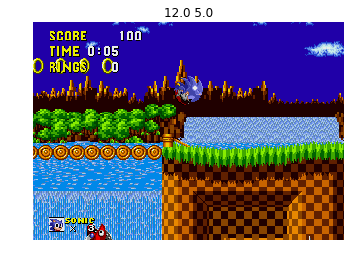

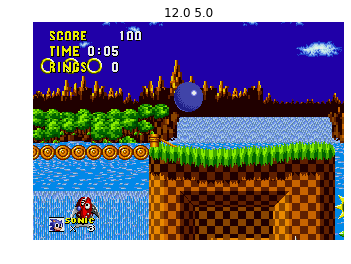

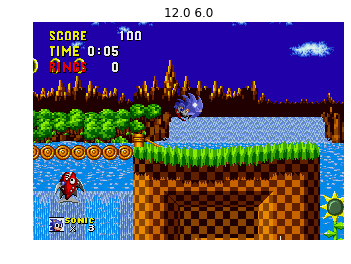

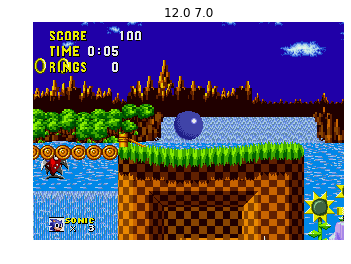

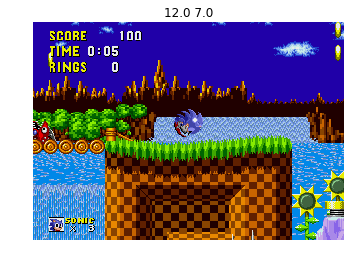

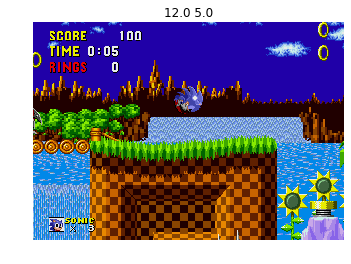

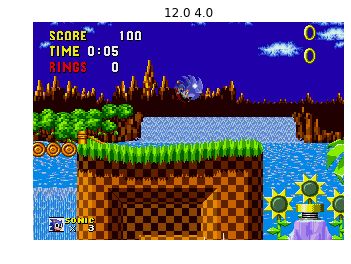

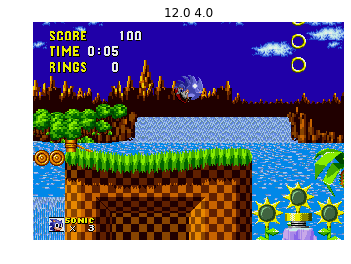

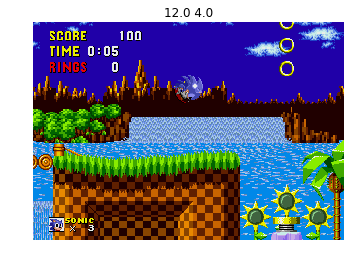

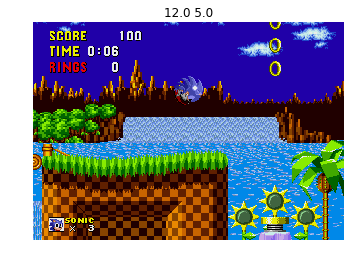

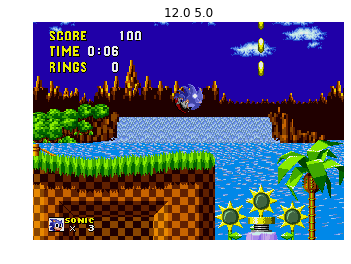

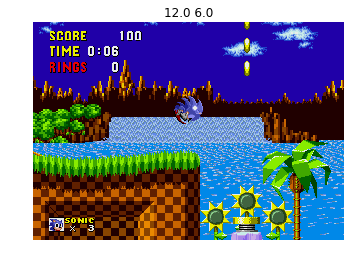

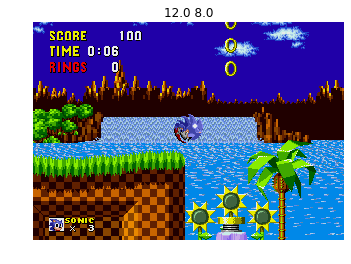

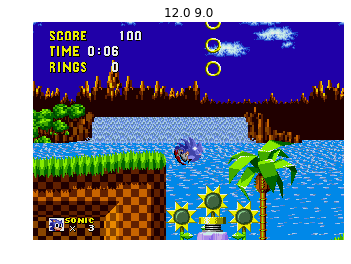

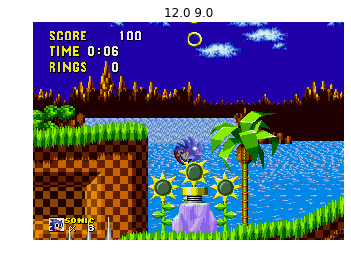

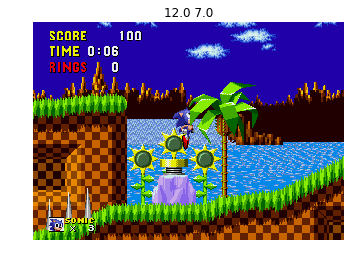

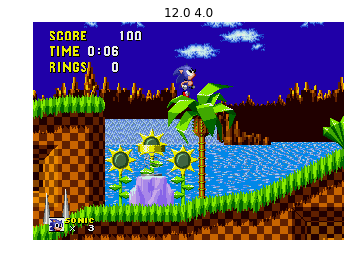

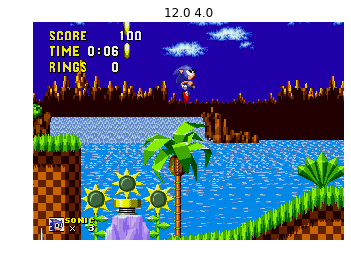

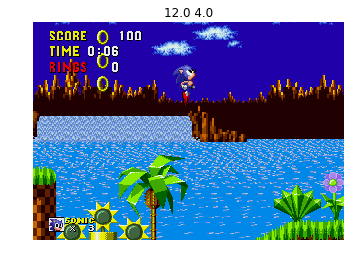

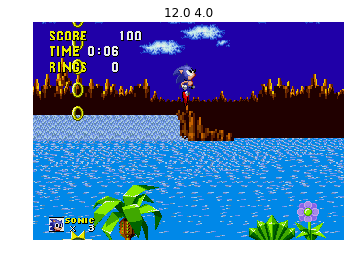

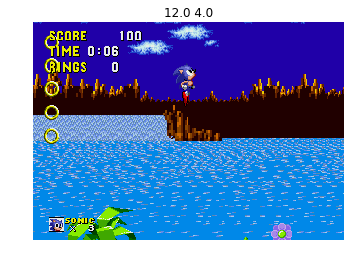

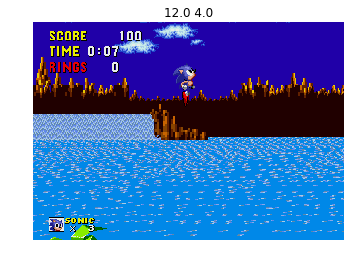

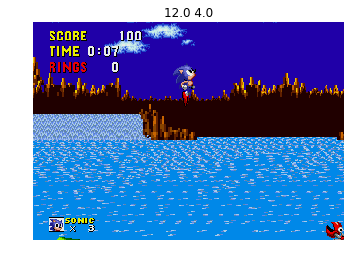

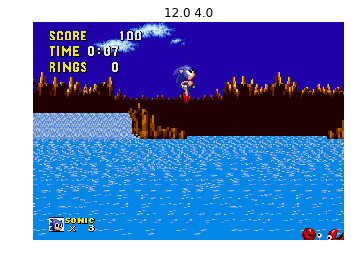

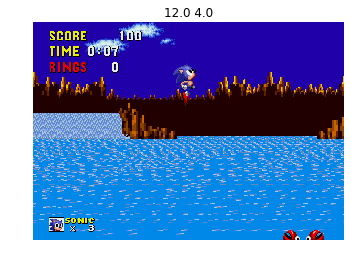

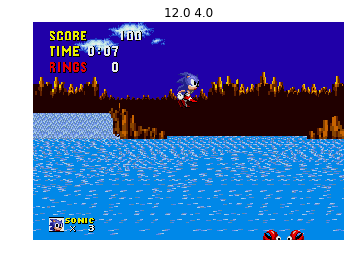

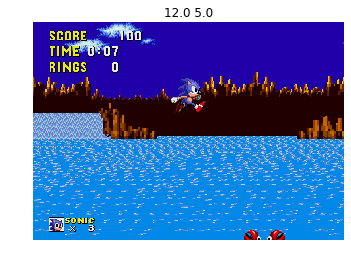

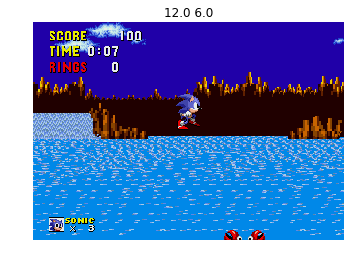

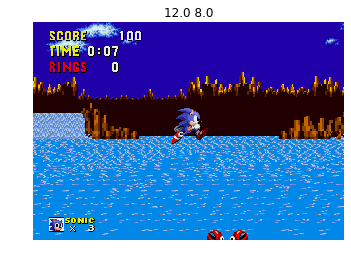

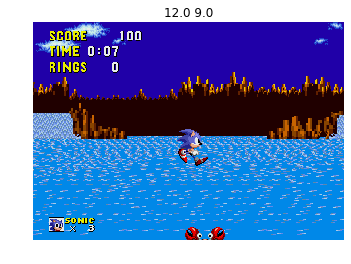

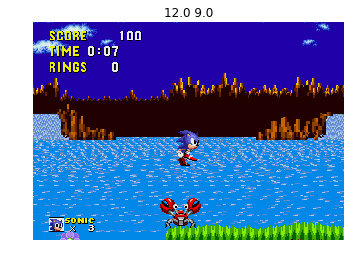

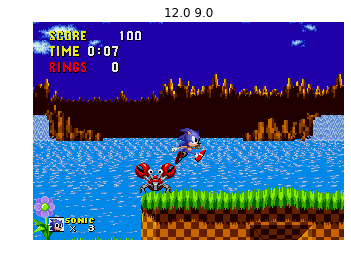

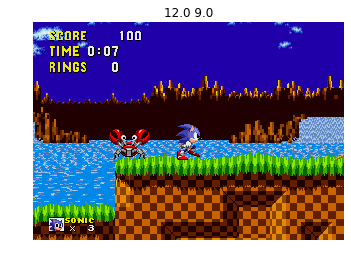

In [7]:
env.reset();
actions =[6,7,8,9]
ys = []
for i in range(500):
    
    action = env.action_space.sample()

    obs, rew, done, info = env.step(action)
    if i > 28 and i % 5 ==0:
        plt.figure(i)
        im = env.render("rgb_array")
        plt.imshow(im)
        ld = env.get_latent_dict(env)
        plt.title(str(ld["x_coord"]) + " " + str(ld["y_coord"]))
        plt.axis("off")


In [7]:
min(ys)

64

In [8]:
info

{'level_end_bonus': 0,
 'rings': 2,
 'score': 10,
 'zone': 0,
 'act': 2,
 'screen_x_end': 10592,
 'screen_y': 713,
 'lives': 3,
 'x': 974,
 'y': 785,
 'screen_x': 818}

In [4]:
env = SonicDiscretizer(env)

In [10]:
a = env.action_space.sample()

In [11]:
a

5

In [12]:
env.reset()

array([[[ 32,   0,   0],
        [ 96,  32,   0],
        [ 96,  32,   0],
        ...,
        [168,  68,   0],
        [168,  68,   0],
        [168,  68,   0]],

       [[ 32,   0,   0],
        [ 96,  32,   0],
        [ 96,  32,   0],
        ...,
        [168,  68,   0],
        [168,  68,   0],
        [168,  68,   0]],

       [[ 32,   0,   0],
        [ 96,  32,   0],
        [168,  68,   0],
        ...,
        [168,  68,   0],
        [168,  68,   0],
        [ 96,  32,   0]],

       ...,

       [[ 64, 236,   0],
        [200, 204,   0],
        [ 32, 236,  32],
        ...,
        [ 64, 236,   0],
        [  0, 168,   0],
        [  0, 100,   0]],

       [[ 64, 236,   0],
        [ 32, 236,  32],
        [200, 204,   0],
        ...,
        [ 64, 236,   0],
        [  0, 168,   0],
        [  0, 100,   0]],

       [[ 64, 236,   0],
        [ 64, 236,   0],
        [200, 204,   0],
        ...,
        [ 64, 236,   0],
        [ 64, 236,   0],
        [  0, 168,   0]]

In [15]:
env.env.statename

'AngelIslandZone.Act1.state'

In [17]:
sd.action_space.n

sd.env.gamename

games = retro.data.list_games()
valid_games = []
for game in games:
    try:
        retro.make(game)
        print(game)
        valid_games.append(game)
    except:
        continue

from matplotlib import pyplot as plt

%matplotlib inline

In [88]:

# games = retro.data.list_games()
# env = None
# j = 0
# for game in games:
#     #print(game)
#     try:
#         env = retro.make(game)
#         del env
#         env = None
#     except:
#         env = None
#         continue
#     states = retro.data.list_states(game)
#     for state in states:
#         if "2" not in state:

#             del env
#             env = retro.make(game=game,state=state)

#             obs = env.reset()
#             for i in range(200):
#                 env.step(env.action_space.sample())
#                 if i > 99 and i % 20 ==0:

#                     plt.figure(j)
#                     plt.imshow(env.render("rgb_array"))
#                     plt.title(game + "_" + state,color="b")
#                     j+=1
#         break

In [2]:
env=None
for game in valid_games:
    print(game)
    del env
    env = retro.make(game)
    ms = []
    actions = []
    for i in range(100000):
        a = env.action_space.sample()
        meaning = env.get_action_meaning(a)
        meaning.sort()
        actions.extend(meaning)
        if meaning not in ms:
            ms.append(meaning)

    print(len(ms))

Airstriker-Genesis
126
AlienSoldier-Genesis
126
AlteredBeast-Genesis
126
BioHazardBattle-Genesis
126
Columns-Genesis
126
ColumnsIII-Genesis
126
ComixZone-Genesis
126
CrackDown-Genesis
126
DrRobotniksMeanBeanMachine-Genesis
126
DynamiteHeaddy-Genesis
126
FatalLabyrinth-Genesis
126
Flicky-Genesis
126
GainGround-Genesis
126
GalaxyForceII-Genesis
126
GoldenAxe-Genesis
126
GoldenAxeIII-Genesis
126
KidChameleon-Genesis
135
MonsterLair-Genesis
126
RevengeOfShinobi-Genesis
126
Ristar-Genesis
126
ShadowDancerTheSecretOfShinobi-Genesis
126
ShinobiIIIReturnOfTheNinjaMaster-Genesis


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-c3ed013b332b>", line 11, in <module>
    meaning.sort()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/ultratb.py", line 311, in wrapped

KeyboardInterrupt: 

In [7]:
env.reset()
maxy = 0
miny = 1057
for i in range(100):
    a = env.action_space.sample()
    _obs, _rew, done, _info = env.step(a)
    print(env.get_action_meaning(a))
    print(_info["x"])
    if _info["y"] > maxy:
        maxy = copy.deepcopy(_info["y"])
    if _info["y"] < miny:
        miny = copy.deepcopy(_info["y"])

from ple import gym_ple
import gym
import retro

env.buttons

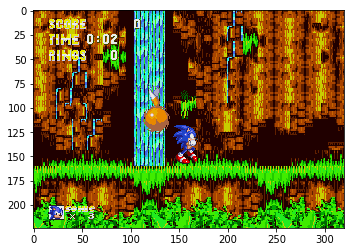

In [12]:
from comet_ml import Experiment

In [13]:
Experiment?

Init signature: Experiment(api_key=None, project_name=None, team_name=None, workspace=None, log_code=True, log_graph=True, auto_param_logging=True, auto_metric_logging=True, parse_args=True, auto_output_logging='native', disabled=False, log_env_details=True, log_git_metadata=True)
Docstring:     
Experiment is a unit of measurable research that defines a single run with some data/parameters/code/results.

Creating an Experiment object in your code will report a new experiment to your Comet.ml project. Your Experiment
will automatically track and collect many things and will also allow you to manually report anything.

You can create multiple objects in one script (such as when looping over multiple hyper parameters).
Init docstring:
Creates a new experiment on the Comet.ml frontend.
Args:
    api_key: Your API key obtained from comet.ml
    project_name: Optional. Send your experiment to a specific project. Otherwise will be sent to `Uncategorized Experiments`.
                     If 